3


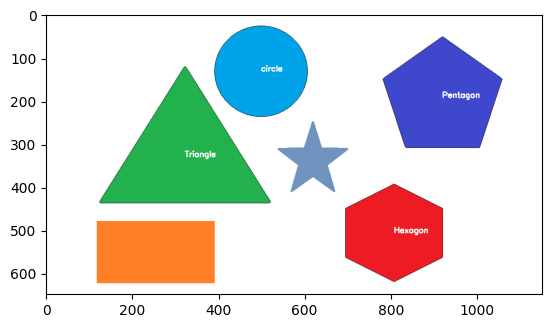

In [26]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

  
# reading image 
img = cv2.imread('shapes.png') 
  
# converting image into grayscale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# setting threshold of gray image 
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) 
  
# using a findContours() function 
contours, _ = cv2.findContours( 
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
  
i = 0
  
# list for storing names of shapes 
for contour in contours: 
  
    # here we are ignoring first counter because  
    # findcontour function detects whole image as shape 
    if i == 0: 
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape 
    approx = cv2.approxPolyDP( 
        contour, 0.01 * cv2.arcLength(contour, True), True) 
      
    # using drawContours() function 
    cv2.drawContours(img, [contour], 0, (0, 0, 0), 1) 
  
    # finding center point of shape 
    M = cv2.moments(contour) 
    if M['m00'] != 0.0: 
        x = int(M['m10']/M['m00']) 
        y = int(M['m01']/M['m00']) 
  
    # putting shape name at center of each shape 
    if len(approx) == 3: 
        cv2.putText(img, 'Triangle', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
        print(len(approx))
  
    elif len(approx) == 4: 
        cv2.putText(img, 'Quadrilateral', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
        print('ada')
  
    elif len(approx) == 5: 
        cv2.putText(img, 'Pentagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
    elif len(approx) == 6: 
        cv2.putText(img, 'Hexagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
    else: 
        cv2.putText(img, 'circle', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
        
  
# displaying the image after drawing contours 
# cv2.imshow('shapes', img) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Shapes: 14
16


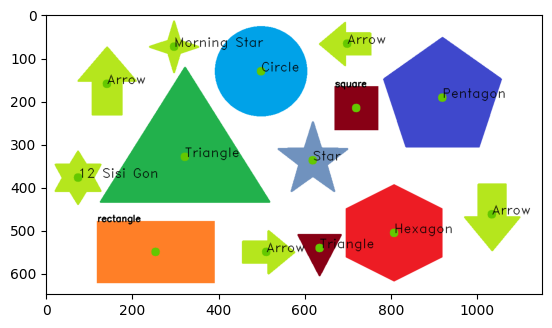

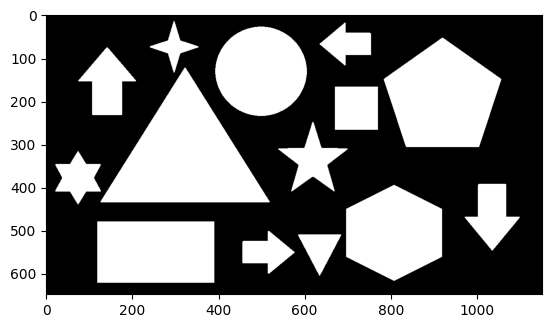

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def distance(p1, p2, p3, p4):
    global l1, l2, l3, l4, a ,b 
    l1 = int(((p4[0] - p3[0])**2 + (p4[1] - p3[1])**2)**0.5)
    l2 = int(((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5)
    l3 = int(((p3[0] - p1[0])**2 + (p3[1] - p1[1])**2)**0.5)
    l4 = int(((p4[0] - p2[0])**2 + (p4[1] - p2[1])**2)**0.5)
    a = l1 == l2
    b = l3 == l4
    return l1, l2, l3, l4, a, b

def get_corner_angle(p1, p2, p3):
    v1 = np.array([p1[0] - p2[0], p1[1] - p2[1]])
    v2 = np.array([p1[0] - p3[0], p1[1] - p3[1]])
    v1_unit = unit_vector(v1)
    v2_unit = unit_vector(v2)
    radians = np.arccos(np.clip(np.dot(v1_unit, v2_unit), -1, 1))
    return np.degrees(radians)

def get_corner_angle_opp(p4, p2, p3):
    v3 = np.array([p4[0] - p2[0], p4[1] - p2[1]])
    v4 = np.array([p4[0] - p3[0], p4[1] - p3[1]])
    v3_unit = unit_vector(v3)
    v4_unit = unit_vector(v4)
    radians = np.arccos(np.clip(np.dot(v3_unit, v4_unit), -1, 1))
    return np.degrees(radians)


def unit_vector(v):
    return v / np.linalg.norm(v)
# load image
img = cv2.imread("shapes.png")

# mask
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.inRange(gray, 240, 255)

# dilate and invert
kernel = np.ones((3,3), np.uint8)
mask = cv2.dilate(mask, kernel, iterations = 1)
mask = cv2.bitwise_not(mask)

# contours
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# remove very large and very small contours
filtered = []
low = 1000
high = 100000
for con in contours:
    area = cv2.contourArea(con)
    if low < area and area < high:
        filtered.append(con)

# draw centers of each
print("Shapes: " + str(len(filtered)))
for con in filtered:
    M = cv2.moments(con)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.circle(img, (cx, cy), 10, (0, 200, 100), -1)

    epsilon = 0.01*cv2.arcLength(con, True)
    approx = cv2.approxPolyDP(con, epsilon, True)

    coords = (cx, cy)
    colour = (0, 0, 0)
    font = cv2.FONT_HERSHEY_DUPLEX

    p1 = approx[0][0]
    p2 = approx[1][0]
    p3 = approx[-1][0]
    p4 = approx[2][0]

   
    

    if len(approx) == 3:
        cv2.putText(img, "Triangle", coords, font, 1, colour, 1) # Text on the image
    elif len(approx) == 4:
        (degrees) = get_corner_angle(p1, p2, p3)
        (degrees_opp) = get_corner_angle_opp(p4, p2, p3)
        dist1 = distance(p1, p2, p3, p4)
        (x, y, w, h) = cv2.boundingRect(approx)
        if  ((89 <= int(degrees) <= 91) and  ((89 <= int(degrees_opp) <= 91)) and (float(w)/h)==1) and (a == b):
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 0, 2)
        elif (a == True or b == True)  and (int(degrees) or int(degrees_opp) !=90) and (int(degrees_opp)-int(degrees) not in (-1,0,1)):
                shape = "Trapezoid"
        elif (int(degrees)-int(degrees_opp) in (-1,0,1)) and(a-b in (-1,0,1)):
            shape = "Rhombus"
        elif (a == True or b == True) and (int(degrees) == int(degrees_opp)):
            shape  = "Parallelogram"
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 0, 2)

        # cv2.putText(img, "Quadrilateral", coords, font, 1, colour, 1)
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", coords, font, 1, colour, 1)
    elif len(approx) == 6:
        cv2.putText(img, "Hexagon", coords, font, 1, colour, 1)

    elif len(approx) == 7:
        cv2.putText(img, "Arrow", coords, font, 1, colour, 1)
        
    elif len(approx) == 8:
        cv2.putText(img, "Morning Star", coords, font, 1, colour, 1)
    
    elif len(approx) == 10:
        cv2.putText(img, "Star", coords, font, 1, colour, 1)

    elif len(approx) == 12:
        cv2.putText(img, "12 Sisi Gon", coords, font, 1, colour, 1)
    
    else:
        # If the length is not any of the above, we will guess the shape/contour to be a circle.
        cv2.putText(img, "Circle", coords, font, 1, colour, 1)
        print(len(approx))
# show
# cv2.imshow("Image", img)
# cv2.imshow("Mask", mask)
# cv2.waitKey(0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()

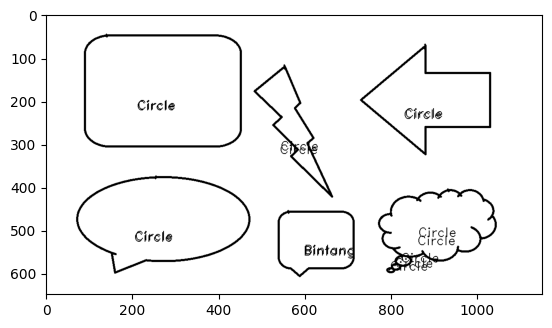

In [6]:
import cv2 # OpenCV Library

# Image to detect shapes on below
image = cv2.imread("SatuShape.png")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converting to gray image

# Setting threshold value to get new image (In simpler terms: this function checks every pixel, and depending on how
# dark the pixel is, the threshold value will convert the pixel to either black or white (0 or 1)).
_, thresh_image = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)

# Retrieving outer-edge coordinates in the new threshold image
contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterating through each contour to retrieve coordinates of each shape
for i, contour in enumerate(contours):
    if i == 0:
        continue

    # The 2 lines below this comment will approximate the shape we want. The reason being that in certain cases the
    # shape we want might have flaws or might be imperfect, and so, for example, if we have a rectangle with a
    # small piece missing, the program will still count it as a rectangle. The epsilon value will specify the
    # precision in which we approximate our shape.
    epsilon = 0.01*cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Drawing the outer-edges onto the image
    cv2.drawContours(image, contour, 0, (0, 0, 0), 4)

    # Retrieving coordinates of the contour so that we can put text over the shape.
    x, y, w, h= cv2.boundingRect(approx)
    x_mid = int(x + (w/3)) # This is an estimation of where the middle of the shape is in terms of the x-axis.
    y_mid = int(y + (h/1.5)) # This is an estimation of where the middle of the shape is in terms of the y-axis.

    # Setting some variables which will be used to display text on the final image
    coords = (x_mid, y_mid)
    colour = (0, 0, 0)
    font = cv2.FONT_HERSHEY_DUPLEX

    # This is the part where we actually guess which shape we have detected. The program will look at the amount of edges
    # the contour/shape has, and then based on that result the program will guess the shape (for example, if it has 3 edges
    # then the chances that the shape is a triangle are very good.)
    #
    # You can add more shapes if you want by checking more lenghts, but for the simplicity of this tutorial program I
    # have decided to only detect 5 shapes.
    if len(approx) == 3:
        cv2.putText(image, "Triangle", coords, font, 1, colour, 1) # Text on the image
    elif len(approx) == 4:
        cv2.putText(image, "Quadrilateral", coords, font, 1, colour, 1)
    elif len(approx) == 5:
        cv2.putText(image, "Pentagon", coords, font, 1, colour, 1)
    elif len(approx) == 6:
        cv2.putText(image, "Hexagon", coords, font, 1, colour, 1)
    
    elif len(approx) == 10:
        cv2.putText(image, "Bintang", coords, font, 1, colour, 1)
    
    else:
        # If the length is not any of the above, we will guess the shape/contour to be a circle.
        cv2.putText(image, "Circle", coords, font, 1, colour, 1)
        
    
# Displaying the image with the detected shapes onto the screen
# cv2.imshow("shapes_detected", image)
# cv2.waitKey(0)
plt.imshow(image)